In [69]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

%matplotlib inline

### Load the Data

In [3]:
df = pd.read_csv('Data/final_data.csv')

In [4]:
grouped_df = df.groupby("position_encoded")

In [5]:
df = df.drop(columns='player')

In [7]:
df.shape

(10754, 21)

In [8]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


### Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [10]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [11]:
# Completeness
df.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [12]:
# Accurecy types
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [13]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards',
                    'second yellow cards','red cards','goals conceded','clean sheets','award',
                    'games_injured','days_injured','minutes played']

In [14]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


(array([  17.,   81.,  672., 1655., 2459., 2882., 1961.,  871.,  147.,
           9.]),
 array([156., 161., 166., 171., 176., 181., 186., 191., 196., 201., 206.]),
 <BarContainer object of 10 artists>)

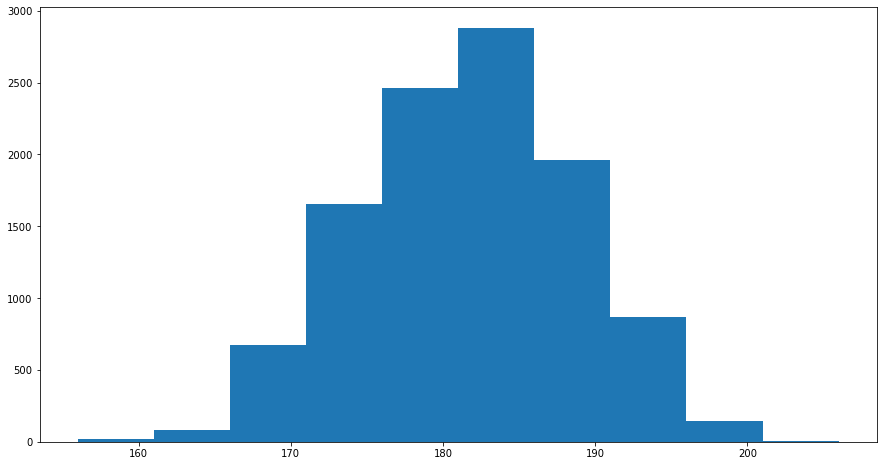

In [15]:
plt.figure(figsize=(15,8))
plt.hist(df['height'])

(array([ 105.,  635., 2157., 1590., 1599., 1994., 1101., 1068.,  326.,
         146.]),
 array([15. , 17.4, 19.8, 22.2, 24.6, 27. , 29.4, 31.8, 34.2, 36.6, 39. ]),
 <BarContainer object of 10 artists>)

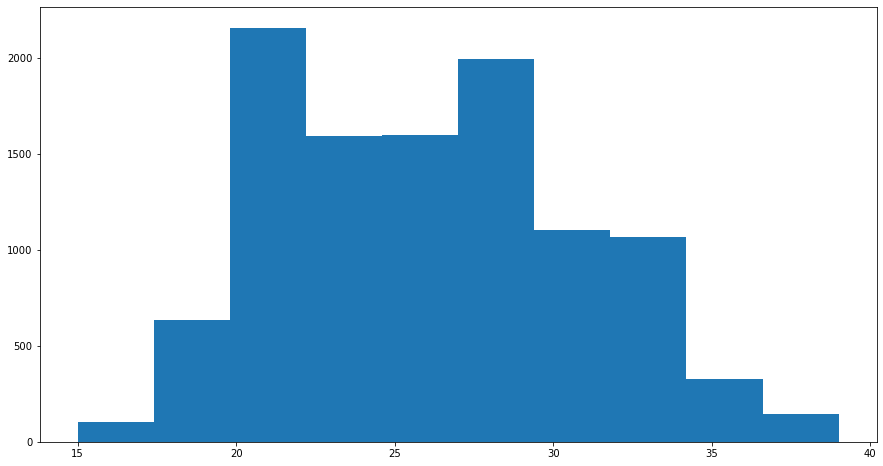

In [16]:
plt.figure(figsize=(15,8))
plt.hist(df[df['age']<40]['age'])

In [17]:
df = df[df['age']<40]

In [18]:
df.shape

(10721, 21)

(array([2262., 1738.,  837.,  969., 1130., 1222., 1179.,  813.,  376.,
         161.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

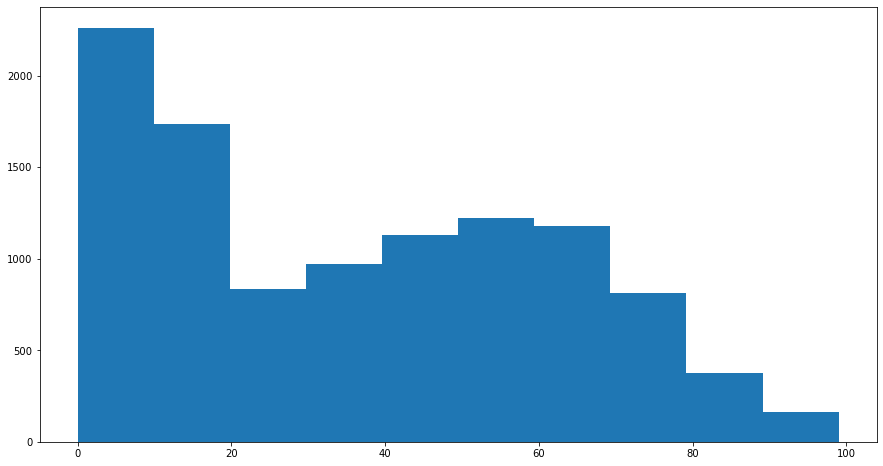

In [19]:
plt.figure(figsize=(15,8))
plt.hist(df[df['appearance']<100]["appearance"])

In [20]:
df = df[df["appearance"]<100]

In [21]:
df.shape

(10687, 21)

(array([1.065e+04, 3.100e+01, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  1.125,  2.25 ,  3.375,  4.5  ,  5.625,  6.75 ,  7.875,
         9.   , 10.125, 11.25 ]),
 <BarContainer object of 10 artists>)

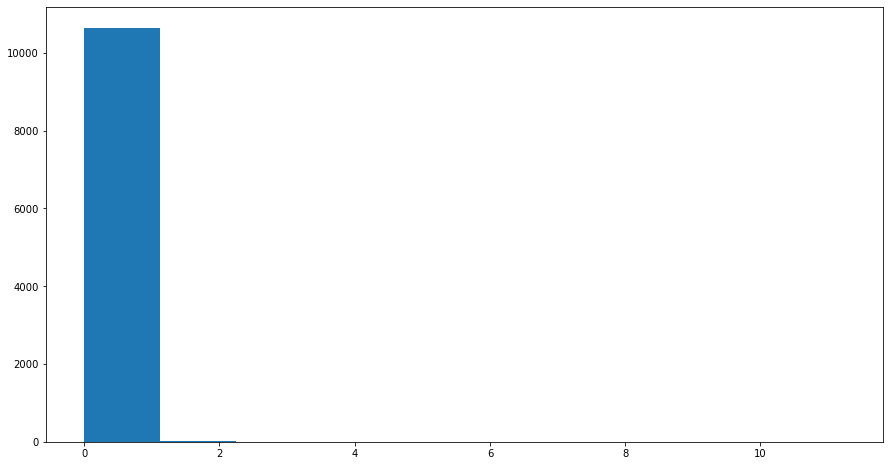

In [22]:
plt.figure(figsize=(15,8))
plt.hist(df[df['goals']<20]["goals"])

In [23]:
df = df[df["goals"]<100]

In [24]:
df.shape

(10687, 21)

(array([1.065e+04, 3.100e+01, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  1.125,  2.25 ,  3.375,  4.5  ,  5.625,  6.75 ,  7.875,
         9.   , 10.125, 11.25 ]),
 <BarContainer object of 10 artists>)

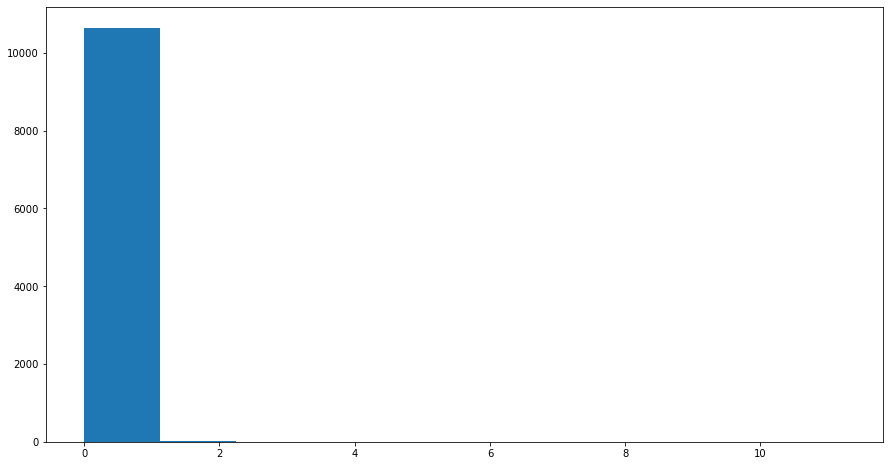

In [25]:
plt.figure(figsize=(15,8))
plt.hist(df[df['goals']<20]["goals"])

In [26]:
df = df[df["goals"]<20]

In [27]:
df.shape

(10687, 21)

(array([1.0435e+04, 2.0800e+02, 2.9000e+01, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

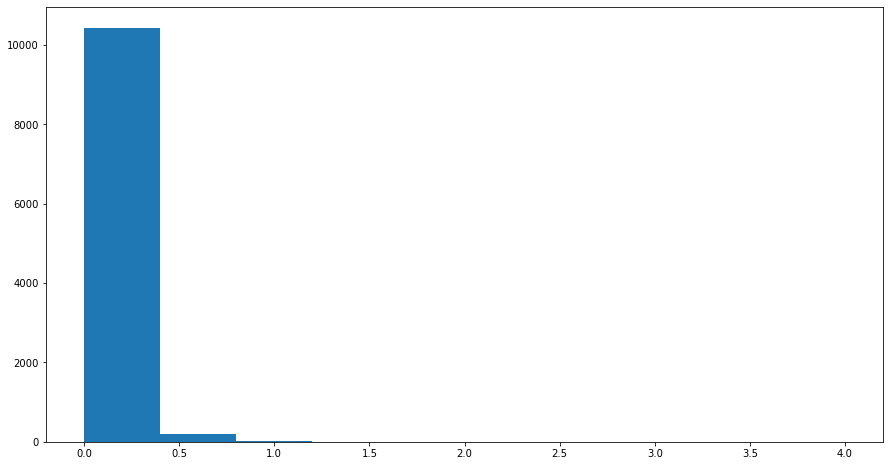

In [28]:
plt.figure(figsize=(15,8))
plt.hist(df[df['assists']<12]["assists"])

In [29]:
df = df[df['assists']<12]

In [30]:
df.shape

(10687, 21)

(array([1.0629e+04, 4.2000e+01, 3.0000e+00, 4.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  1.28571429,  2.57142857,  3.85714286,  5.14285714,
         6.42857143,  7.71428572,  9.        , 10.28571429, 11.57142857,
        12.85714286]),
 <BarContainer object of 10 artists>)

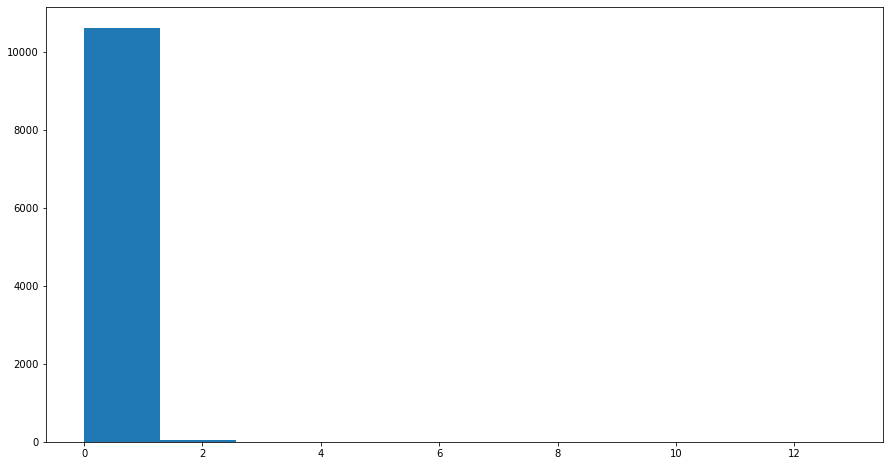

In [31]:
plt.figure(figsize=(15,8))
plt.hist(df[df['yellow cards']<=20]["yellow cards"])

In [32]:
df = df[df['yellow cards']<=20]

In [33]:
df.shape

(10686, 21)

In [34]:
df['second yellow cards'].value_counts()

second yellow cards
0.000000    9519
0.025035       3
0.021464       3
0.021388       3
0.036364       3
            ... 
0.019007       1
0.016657       1
0.065934       1
0.024045       1
0.057878       1
Name: count, Length: 1094, dtype: int64

In [35]:
df = df[df["second yellow cards"]<3]

In [37]:
df['red cards'].value_counts()

red cards
0.000000    9363
0.039233       3
0.018572       3
0.019811       3
0.081818       3
            ... 
0.020045       1
0.018995       1
0.028391       1
0.025288       1
0.104046       1
Name: count, Length: 1211, dtype: int64

In [38]:
df = df[df["red cards"]<3]

(array([4766., 2204., 1218.,  726.,    0.,  455.,  320.,  214.,  193.,
         118.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

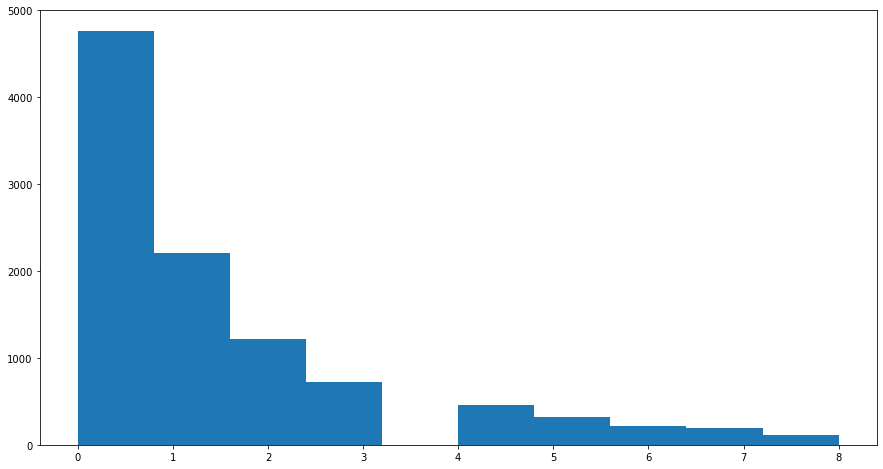

In [39]:
plt.figure(figsize=(15,8))
plt.hist(df[df["award"]<9]["award"])

In [40]:
df = df[df['award']<9]

(array([6120., 1242.,  782.,  707.,  432.,  297.,  184.,  145.,   88.,
          80.]),
 array([  0. ,  69.7, 139.4, 209.1, 278.8, 348.5, 418.2, 487.9, 557.6,
        627.3, 697. ]),
 <BarContainer object of 10 artists>)

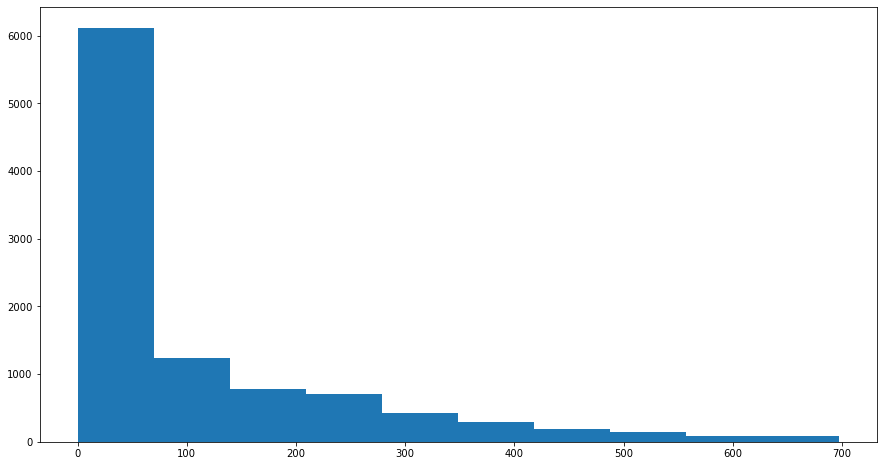

In [41]:
plt.figure(figsize=(15,8))
plt.hist(df[df["days_injured"]<=700]["days_injured"])

In [42]:
df = df[df["days_injured"]<=700]

(array([5609., 1146.,  824.,  597.,  470.,  385.,  302.,  242.,  168.,
         107.]),
 array([ 0. ,  6.9, 13.8, 20.7, 27.6, 34.5, 41.4, 48.3, 55.2, 62.1, 69. ]),
 <BarContainer object of 10 artists>)

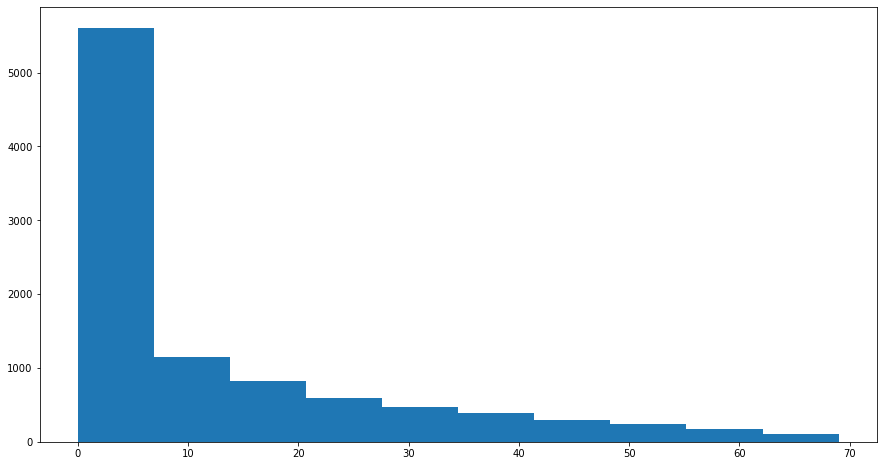

In [43]:
plt.figure(figsize=(15,8))
plt.hist(df[df['games_injured']<70]["games_injured"])

In [44]:
df = df[df['games_injured']<70]

(array([2834., 1536., 1049., 1099.,  965.,  911.,  680.,  395.,  254.,
         105.]),
 array([   0. ,  793.2, 1586.4, 2379.6, 3172.8, 3966. , 4759.2, 5552.4,
        6345.6, 7138.8, 7932. ]),
 <BarContainer object of 10 artists>)

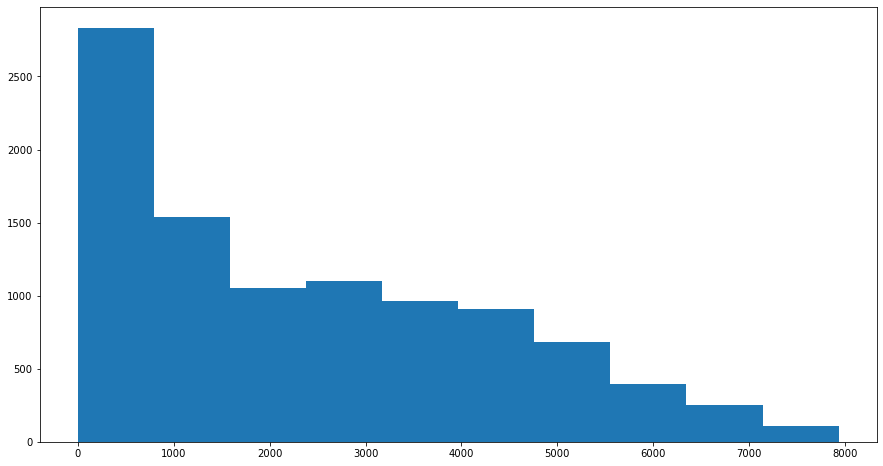

In [45]:
plt.figure(figsize=(15,8))
plt.hist(df[df["minutes played"]<8000]["minutes played"])

In [46]:
df = df[df["minutes played"]<8000]

In [47]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [48]:
df = df.drop(['Unnamed: 0','goals per 90','assists per 90','yellow cards per 90','second yellow cards per 90',
         'red cards per 90','goals conceded per 90','clean sheets per 90'], axis=1)

KeyError: "['Unnamed: 0', 'goals per 90', 'assists per 90', 'yellow cards per 90', 'second yellow cards per 90', 'red cards per 90', 'goals conceded per 90', 'clean sheets per 90'] not found in axis"

In [49]:
df = df.drop(['position','name'],axis=1)

In [50]:
df.columns

Index(['team', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [51]:
df.shape

(9828, 19)

### 2. Feature engineering

1.Feature scaling

2.Aggregation

3.One hot coding

In [52]:
df.head(2)

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,Manchester United,196.0,30.0,15,0.000000,0.0,0.069018,0.0000,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
5,Manchester United,194.0,30.0,68,0.037799,0.0,0.302394,0.0189,0.0,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0


In [53]:
categorical_features

['team']

In [54]:
df = pd.get_dummies(df, columns=categorical_features)

In [55]:
df.shape

(9828, 392)

In [56]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
1,196.0,30.0,15,0.000000,0.0,0.069018,0.0000,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,False
5,194.0,30.0,68,0.037799,0.0,0.302394,0.0189,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [57]:
# Calculate the 35th and 75th percentiles of the price
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(value):
    if value < p35:
        return 'Cheap_Value'
    elif value < p75:
        return 'Good_Value'
    else:
        return 'High_Value'

# Apply the function to create a new column
df['current_value_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Good_Value     4053
Cheap_Value    3174
High_Value     2601
Name: count, dtype: int64


In [58]:
p35, p75

(400000.0, 2500000.0)

In [59]:
encoder = LabelEncoder()
df['current_value_category'] = encoder.fit_transform(df['current_value_category']) 

### 3. Feature selection

In [60]:
# sns.heatmap(df.corr(), annot=True);

In [61]:
correlation = df.corr()
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category     1.000000
appearance                 0.528936
highest_value              0.509113
minutes played             0.502761
award                      0.264919
                             ...   
team_Swallows FC          -0.064124
team_Richards Bay FC      -0.064609
team_Royal AM FC          -0.068306
team_Marumo Gallants FC   -0.069296
goals conceded            -0.130302
Name: current_value_category, Length: 392, dtype: float64


In [62]:
# Set the correlation threshold
threshold = 0.24  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > \
threshold]['current_value_category'].index
selected_features

Index(['appearance', 'minutes played', 'games_injured', 'award',
       'highest_value', 'current_value_category'],
      dtype='object')

In [63]:
# selected_features = ['appearance', 'minutes played', 'current_value',
                    #  'highest_value', 'assists', 'yellow cards', 'goals']

In [64]:
df = df[selected_features]
df.head()

,appearance,minutes played,games_injured,award,highest_value,current_value_category
1,15,1304,58,1,22000000,1
5,68,4762,27,1,70000000,2
8,34,2758,13,0,2000000,1
10,89,7132,15,3,22000000,2
11,34,2686,28,1,12000000,2


### 4. Prepare train and test data

In [66]:
# Prepare data
X = df.drop(['current_value_category'], axis=1)
y = df['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=43)

In [96]:
X.shape

(9828, 5)

## Buliding the Model

In [70]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

In [73]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 10, 15],   # Regularization strength
    'n_estimators':[35, 40, 50, 60]
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [74]:
# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 10, 15],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [84]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 40}

In [80]:
best_model = grid_search.best_estimator_

## Test the Model

In [85]:
# Predict and evaluate the model
y_pred_dt = dt_model.predict(X_test)

In [86]:
y_pred_rf = rf_model.predict(X_test)

In [87]:
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model

In [88]:
# our benchmark model
base_model = round(df['current_value_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model

41.24

1.Accuracy

In [90]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7695829094608342

In [92]:
y_pred_train_dt = dt_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9994912236072246

In [93]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8280773143438453

In [94]:
y_pred_train_rf = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9994912236072246

In [95]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8387589013224822

In [96]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8410073772576953

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[489, 153,  11],
       [  0, 656, 111],
       [  0,  42, 504]], dtype=int64)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,
                      y_pred_rf_g,
                      labels=list(best_model.classes_)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86       653
           1       0.77      0.86      0.81       767
           2       0.81      0.92      0.86       546

    accuracy                           0.84      1966
   macro avg       0.86      0.84      0.84      1966
weighted avg       0.86      0.84      0.84      1966



In [99]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[526, 115,  12],
       [116, 564,  87],
       [  9, 114, 423]], dtype=int64)

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix

array([[513, 128,  12],
       [ 37, 623, 107],
       [  1,  53, 492]], dtype=int64)

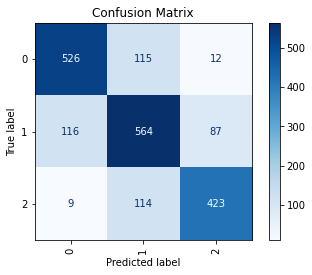

In [105]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(dt_model, X_test, y_test, 
                      display_labels=dt_model.classes_,
                      cmap="Blues",
                      xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [108]:
# Calculate Precision
precision = precision_score(y_test, y_pred_dt, average='macro')
print(f"Precision dt: {precision:.2f}")

Precision dt: 0.78


In [109]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf, average='macro')
print(f"Precision rf: {precision:.2f}")

Precision rf: 0.84


In [110]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision g: {precision:.2f}")

Precision g: 0.86


In [111]:
# Calculate Recall
recall = recall_score(y_test, y_pred_dt, average='macro')
print(f"Recall dt: {recall:.2f}")

Recall dt: 0.77


In [112]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf, average='macro')
print(f"Recall rf: {recall:.2f}")

Recall rf: 0.83


In [113]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall g: {recall:.2f}")

Recall g: 0.84


In [114]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_dt, average='macro')
print(f"F1 Score dt: {f1:.2f}")

F1 Score dt: 0.77


In [115]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf, average='macro')
print(f"F1 Score rf: {f1:.2f}")

F1 Score rf: 0.83


In [116]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score g: {f1:.2f}")

F1 Score g: 0.84


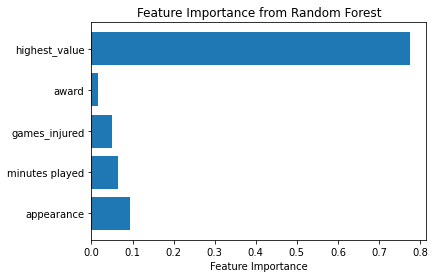

In [117]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()